# Simple Neural Network

[Example from MLNotebook - A simple Nerual Network with numpy in python](https://mlnotebook.github.io/post/nn-in-python/)


In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


[0 0]	 [0.47014753] 	[0.]
[1 1]	 [0.42655795] 	[0.]
[0 1]	 [0.41884831] 	[1.]
[1 0]	 [0.47802474] 	[1.]


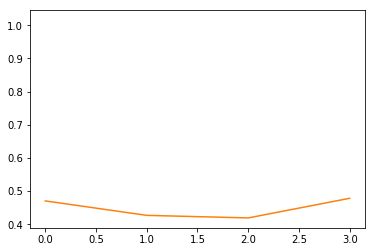

In [2]:
class BackPropagationNetwork:
    num_layers = 0
    shape = None
    weights = []
    
    @staticmethod
    def sigmoid(x, Derivative=False):
        """
        sigmoid maps the input to a value between 0 and 1 but not equal to 0 or 1.
        It means output will be high signal if positive and low signal if negative.
        Simoid's natural threshold is o.5, so any input above will be hig or 1 in binary.
        """
        if not Derivative:
            return 1 / (1 + np.exp (-x))
        else:
            out = BackPropagationNetwork.sigmoid(x)
            return out * (1 - out)
    
    
    def __init__(self, num_nodes):
        self.num_layers = len(num_nodes) - 1
        self.shape = num_nodes
        self._layer_input = []
        self._layer_output = []
        
        for (l1, l2) in zip(num_nodes[:-1], num_nodes[1:]):
            self.weights.append(np.random.normal(scale=0.1, size=(l2, l1 + 1)))
        
    
    def fp(self, i_data):
        """
        Forward pass get input and run it through the NN
        
        O⃗j = σ(Wij O⃗I)
        
        σ is the activation transfer function or sigmoid in this case,
        which is applied element wise to the product of the matrices.
        
        I is our input layer
        J is our hidden layer
        Wij is the weight connecting the ith node in I to the jth node in J
    
        """
        delta = []
        num_examples = i_data.shape[0]
        # clean values from prevous layer
        self._layer_input = []
        self._layer_output = []
        
        for i in range(self.num_layers):
            if i == 0:
                layer_input = self.weights[0].dot(np.vstack([i_data.T, np.ones([1, num_examples])]))
            else:
                layer_input = self.weights[i].dot(np.vstack([i_data.T, np.ones([1, num_examples])]))
            
            self._layer_input.append(layer_input)
            self._layer_output.append(self.sigmoid(layer_input))
                
        return self._layer_output[-1].T
        
        
    def bp(self, i_data, target, t_rate = 0.2):
        """Train epoch (back propagation) get the erro, deltas and back propagate to update the weights"""
        delta = []
        num_examples = i_data.shape[0]
        self.fp(i_data)
        
        # Calculate the deltas
        # δ⃗ K=σ′(WJKO⃗ J)∗(O⃗ K−TK)
        # This is back propagation, we use the reversed function to ensure
        # the algorithm considers the ayers in reverse order.
        for i in reversed(range(self.num_layers)):
            if i == self.num_layers - 1:
                # If the output layer, then compare to the target values
                o_delta = self._layer_output[i] - target.T
                error = np.sum(o_delta**2)
                delta.append(o_delta * self.sigmoid(self._layer_input[i], True))
            else:
                delta_pullback = self.weights[i + 1].T.dot(delta[-1])
                delta.append(delta_pullback[:-1,:] * self.sigmoid(self._layer_input[i], True))

        # Compute updates to each weight
        for i in range(self.num_layers):
            delta_index = self.num_layers - 1 - i    
            if i == 0:
               layer_output = np.vstack([i_data.T, np.ones([1, num_examples])])
            else:
                # If a hidden layer. compare to the following layer's delta
                layer_output = np.vstack([self._layer_output[i - 1], np.ones([1, self._layer_output[i - 1].shape[1]])])
            
            # Update wights
            # δ⃗ J = σ′(WIJOI)∗W⊺JKδ⃗ K
            this_weight_deta = np.sum(layer_output[None,:,:].transpose(2, 0, 1) * delta[delta_index][None,:,:].transpose(2, 1, 0), axis = 0)
            weight_delta = t_rate * this_weight_deta
            
            self.weights[i] -= weight_delta
            
        return error

inp = np.array([[0,0],[1,1],[0,1],[1,0]])
tar = np.array([[0.0],[0.0],[1.0],[1.0]])

bpn = BackPropagationNetwork((2,2,1))

Error = bpn.bp(inp, tar)
Output = bpn.fp(inp)
for i in range(inp.shape[0]):
    print('{0}\t {1} \t{2}'.format(inp[i], Output[i], tar[i]))
    
plt.plot(Error)
plt.plot(Output)

### Iteration

We just tell our algorithm to repeat a maximum of `max_iterations` times or until the `error` is below `min_error` (whichever comes first). As the weights are stored internally within NN every time we call the `bp` method, it uses the latest, internally stored weights and doesn’t start again - the weights are only initialised once upon creation of NN.

Iteration 0	Error: 1.001135
Iteration 2500	Error: 1.000954
Iteration 5000	Error: 1.000821
Iteration 7500	Error: 1.000720
Iteration 10000	Error: 1.000641
[0 0]	 [0.0194421] 	[0.]
[1 1]	 [5.28071524e-05] 	[0.]
[0 1]	 [1.72540829e-08] 	[1.]
[1 0]	 [0.98378906] 	[1.]


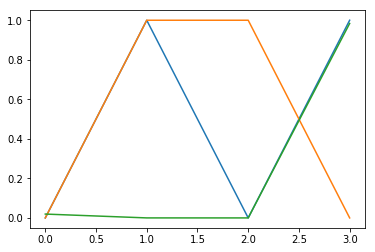

In [5]:
max_iterations = 10000
min_error = 1e-5
error = None
bpn = BackPropagationNetwork((2,2,1))
for i in range(max_iterations + 1):
    error = bpn.bp(inp, tar)
    if i % 2500 == 0:
        print("Iteration {0}\tError: {1:0.6f}".format(i, error))
    if error <= min_error:
        print("Minimum error reached at iteration {0}".format(i))
        break

Output = bpn.fp(inp)
for i in range(inp.shape[0]):
    print('{0}\t {1} \t{2}'.format(inp[i], Output[i], tar[i]))
plt.plot(inp)
plt.plot(Output)

In [8]:
back_propagation.fp?